In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

the train_set parameter details the dataset FashionMNIST and says that this data is used to train the model,
it converts the data into a tensor

the train_loader wraps the data and allows shuffling and different batch sizes to be used in the dataset

the torchvision library is PyTorch's package for popular datasets and common image transformations for computer vision 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
len(train_set)

60000

In [5]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [6]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

there are 60000 training images in our dataset

the labels show what type of clothing item the image in each index represents

the bincount() function on these different batches show that the distribution of different clothing items is equal among the batches, and is known to be a balanced dataset

In [7]:
sample = next(iter(train_set))

In [8]:
len(sample)

2

In [9]:
image, label = sample

the sample image pulled from the data set is found to have a length of two (a tuple), this is due to the each image also storing its label with itself

using a shortcut called sequence unpacking, the sample can be indexed into two values of its image and label, therefore sample[0] and sample[1] the label

In [10]:
image.shape

torch.Size([1, 28, 28])

label 9


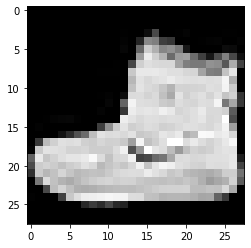

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
print('label', label)

the shape of the image indictes there is one colour dimension, which is also known as grayscale, and the image is 28x28

the 9 label shows this is an ankle-boot

the batch size of the tensor is 0, as it is only one image

In [12]:
batch = next(iter(train_loader))

In [13]:
len(batch)

2

In [14]:
images, labels = batch

In [15]:
images.shape

torch.Size([10, 1, 28, 28])

now calling a batch from the train_loader object, the batch is also found to include both images and their respective labels.

the number of images is 10, as that was the given batch size in the train_loader object

10 images, 1 colour channel, 28x28

labels tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


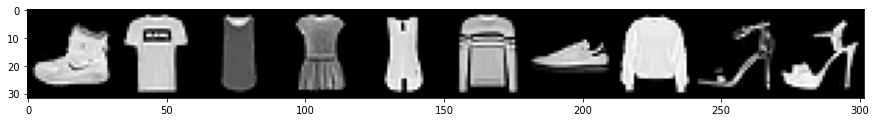

In [16]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels', labels)

In [3]:
import torch.nn as nn

In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc1 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = self.layer(t)
        return t

this network class uses a layer constructor and a forward function which is used in all networks to input tensor data and move it through a layer or network

the class is a subclass of the pytorch neural network library, this library keeps track of the node's weights

the CNN we are building uses two types of layers: linear(fully connected / dense) and convolutional

we have two convolutional and three linear layers


In [5]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

a hyperparameter is a type of parameter which is manually given an argument by the designer based on trial and error, and reliability

kernal_size, out_channel and out_features are hyperparameters

the convolutional layers use the kernal_size parameter with its argument specified. this parameter gives filter size
out_channel is the number of filters being used, therefore the number of output channels

out_features sets the size of the output tensor

the first convolutional layer has an in_channel of 1, this is due to the colour depth of the images being 1, therefore one tensor image being input at a time

the final linear layer has an out_features of 10. this is because therefore 10 different outputs for the 10 different clothing items avaliable

moving from a convolutional layer to a linear layer requires the flattening of a tensor, this is why the in_features of the first linear layer is the the number of output channels from the last convolutional layer multiplied by a modifier